In [150]:
import warnings
warnings.filterwarnings('ignore')

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading & Data Types 

In [152]:
bikes_df=pd.read_csv("day.csv")
bikes_df.shape

(730, 16)

In [153]:
bikes_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [154]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [155]:
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [156]:
bikes_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

#### Season contains numerical values, so converting it to categorical
season (1:spring, 2:summer, 3:fall, 4:winter)

In [157]:
bikes_df['season'] = bikes_df.season.apply(lambda x:'spring' if x==1 else ('summer' if x==2 else ('fall' if x==3 else 'winter')))

In [158]:
bikes_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [159]:
bikes_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### weathersit contains numerical values, so converting it to categorical
weathersit (1:clear, 2:cloudy, 3:rainy)

In [160]:
bikes_df['weathersit'] = bikes_df.weathersit.apply(lambda x:'clear' if x==1 else ('cloudy' if x==2 else 'rainy'))

In [161]:
bikes_df.weathersit.value_counts()

clear     463
cloudy    246
rainy      21
Name: weathersit, dtype: int64

### Checking month wise bikes 'cnt' with different seasons

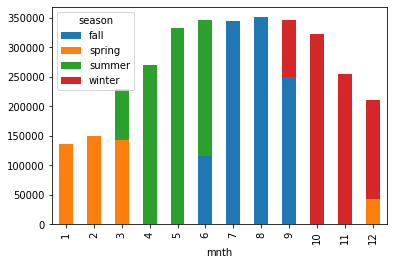

In [162]:
monthly = pd.pivot_table(data=bikes_df,values="cnt",index="mnth",columns='season',aggfunc=sum)
monthly.plot(kind="bar",stacked=True)

#### Insight
Bikes cnt seems decrease in spring season

### Checking month wise bikes 'cnt' with different weather

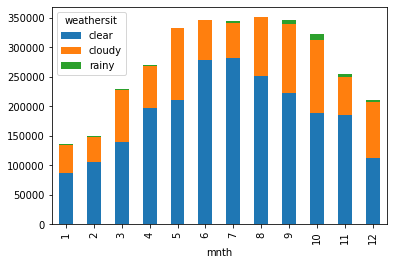

In [163]:
monthly = pd.pivot_table(data=bikes_df,values="cnt",index="mnth",columns='weathersit',aggfunc=sum)
monthly.plot(kind="bar",stacked=True)

#### Insight
Bikes cnt seems almost negligible in rainy weather

In [164]:
bikes_df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

#### mnth contains numerical values, so converting it to categorical
mnth (1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec)

In [165]:
def ass_mnth(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'        
    })

bikes_df[['mnth']] = bikes_df[['mnth']].apply(ass_mnth)

In [166]:
bikes_df.mnth.value_counts()

Oct    62
Mar    62
Aug    62
Dec    62
May    62
Jan    62
Jul    62
Jun    60
Nov    60
Apr    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [167]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


# Data Visualization

In [168]:
bikes_df.describe().columns # numerical col names

Index(['instant', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [169]:
num_col = bikes_df[['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
num_col

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...
725,726,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [170]:
x = num_col.columns
x

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

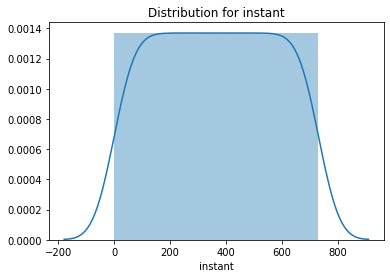

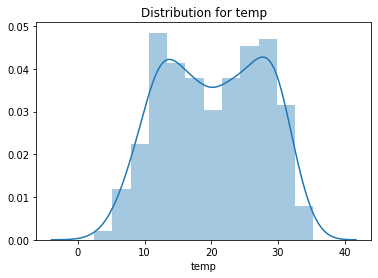

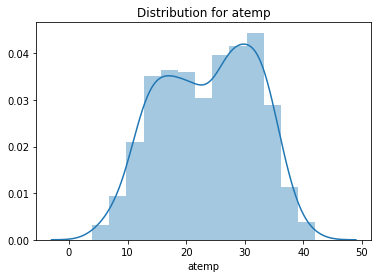

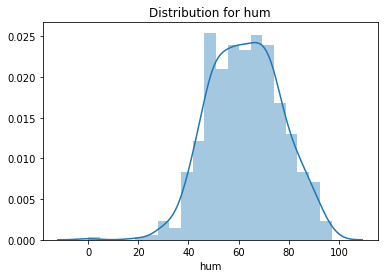

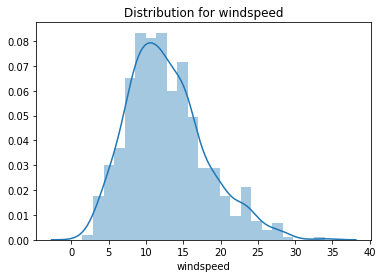

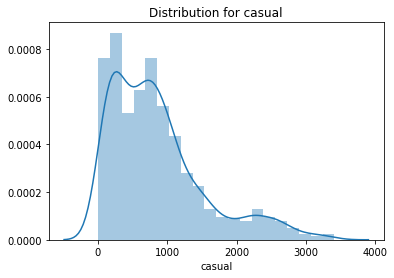

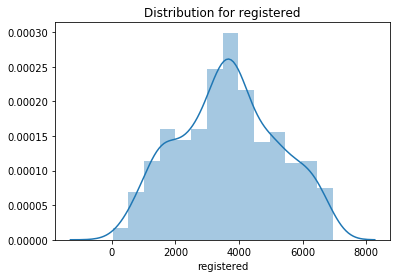

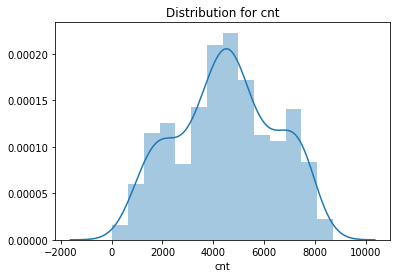

In [171]:
for col in x:
    sns.distplot(bikes_df[col])
    plt.title("Distribution for "+col)
    plt.show();
    print("=================================")

# Visualize Categorical Cols

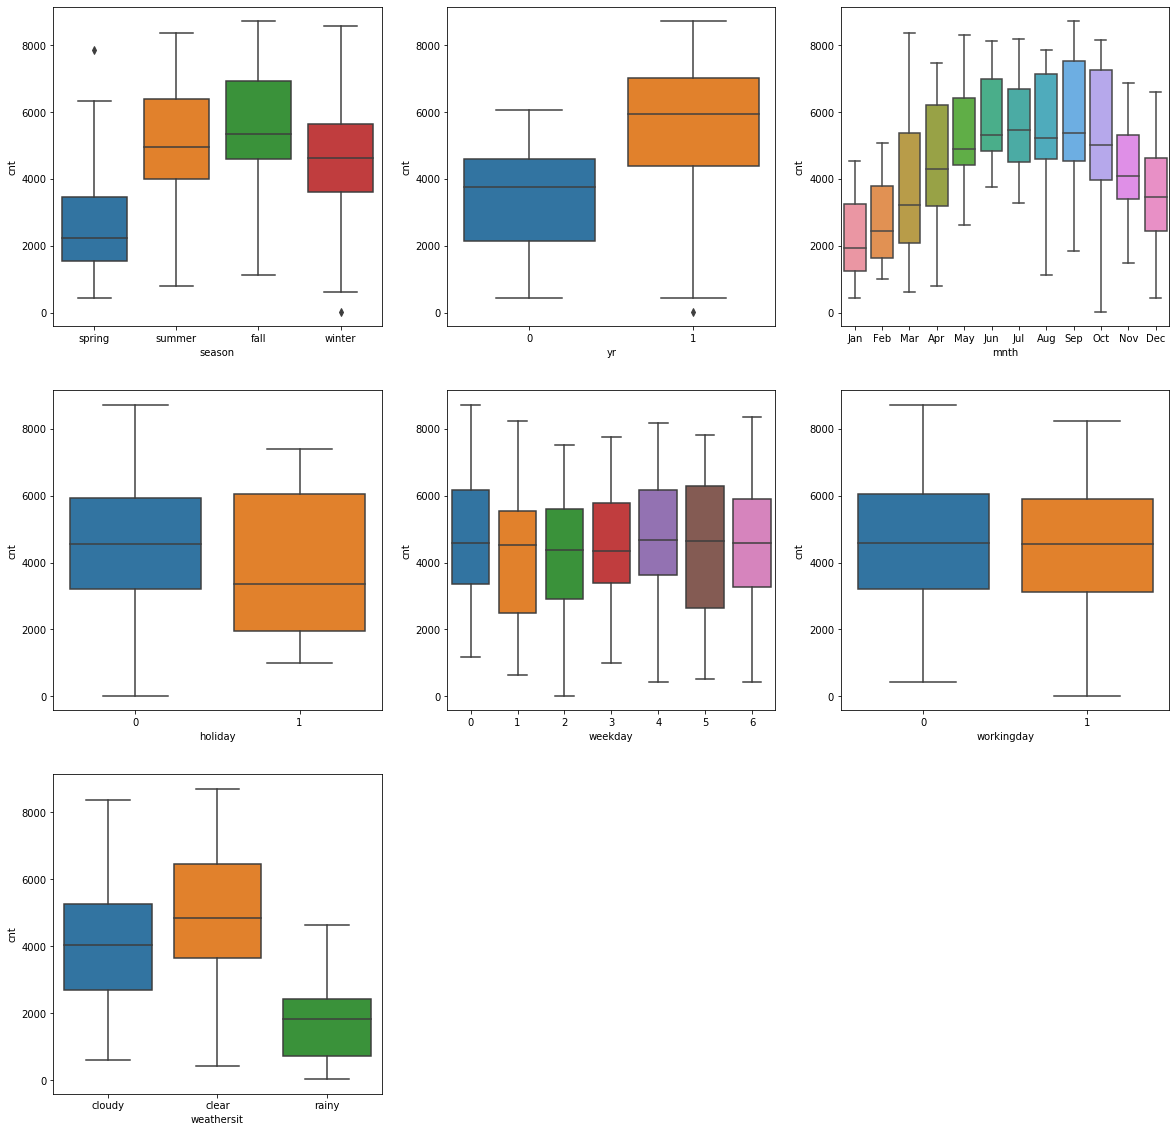

In [172]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1) # plt.subplot(331)
sns.boxplot(x='season', y='cnt', data=bikes_df)
plt.subplot(3,3,2) # plt.subplot(331)
sns.boxplot(x='yr', y='cnt', data=bikes_df)
plt.subplot(3,3,3) # plt.subplot(331)
sns.boxplot(x='mnth', y='cnt', data=bikes_df)
plt.subplot(3,3,4) # plt.subplot(331)
sns.boxplot(x='holiday', y='cnt', data=bikes_df)
plt.subplot(3,3,5) # plt.subplot(331)
sns.boxplot(x='weekday', y='cnt', data=bikes_df)
plt.subplot(3,3,6) # plt.subplot(331)
sns.boxplot(x='workingday', y='cnt', data=bikes_df)
plt.subplot(3,3,7) # plt.subplot(331)
sns.boxplot(x='weathersit', y='cnt', data=bikes_df)
plt.show();

#### Insights
1. season : Demand for bikes goes very down in Spring season
2. yr : Demand for bikes is less in year 2018 and more in year 2019
3. holiday : On holiday demand for bikes is less.
4. weathersit : Demand for bikes is more in clear weather, less in rainy weather, and no demand in winters.

In [173]:
x

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [174]:
x = x[1:]
x

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

# Analyzing Numerical variables


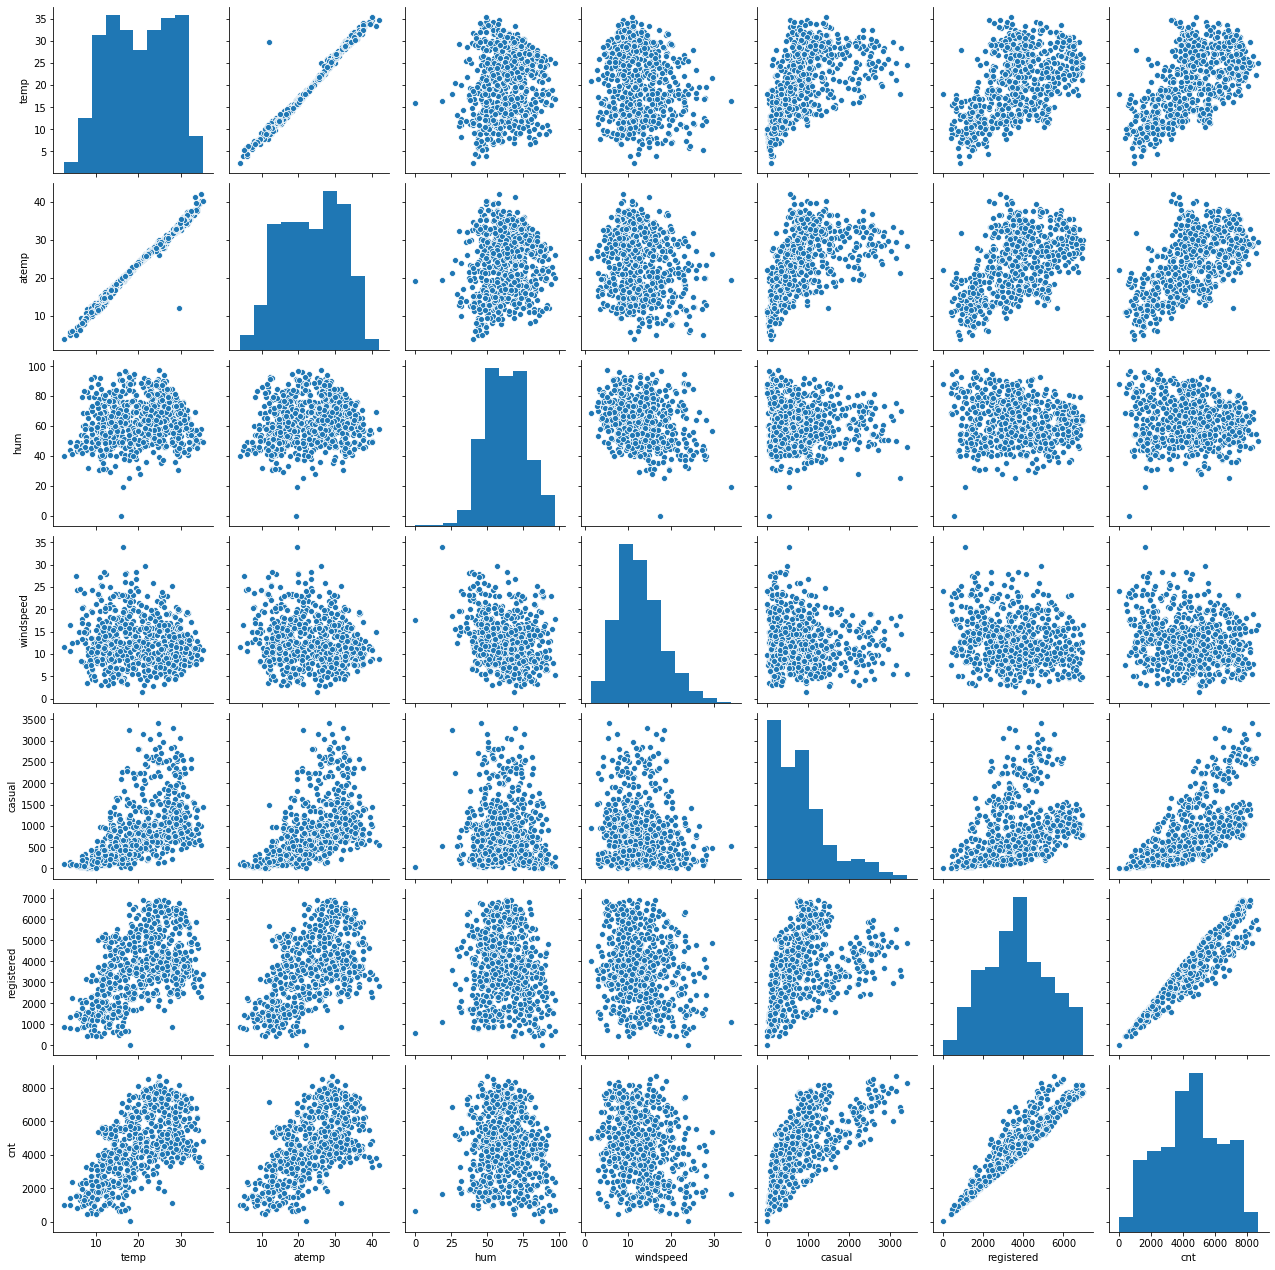

In [175]:
sns.pairplot(bikes_df[x]);

## Insights
1. temp and atemp are very high correlated, so one can be dropped
2. cnt depends upon casual and registered.
3. cnt is correlated to temp.

In [176]:
bikes_df[x].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


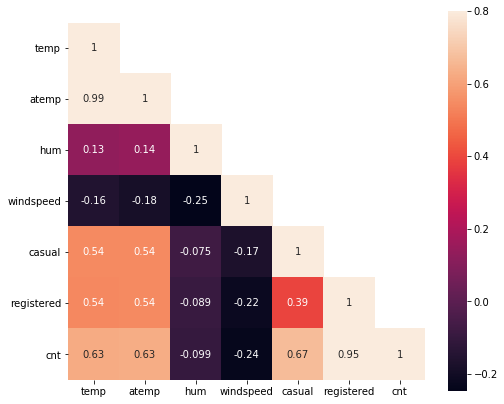

In [177]:
# heatmap
mask = np.array(bikes_df[x].corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(8,7)
sns.heatmap(bikes_df[x].corr(), mask=mask, vmax=0.8, square=True, annot=True);

In [178]:
# drop atemp col as it is very highly correlated to temp col
bikes_df.drop('atemp', axis=1,inplace=True)

In [179]:
bikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Text(0, 0.5, 'cnt')

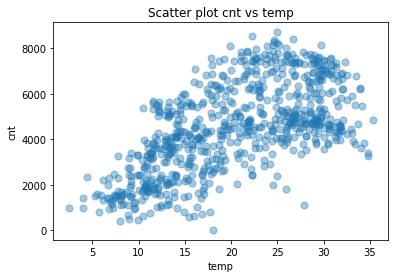

In [180]:
plt.scatter(bikes_df['temp'], bikes_df['cnt'], alpha= 0.4, s = 50 )
plt.title('Scatter plot cnt vs temp')
plt.xlabel('temp')
plt.ylabel('cnt')

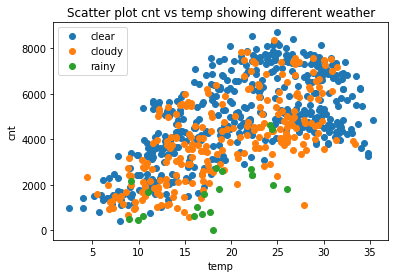

In [181]:
groups = bikes_df.groupby("weathersit")
for name, group in groups:
    plt.plot(group["temp"], group["cnt"], marker="o", linestyle="", label=name)
plt.title('Scatter plot cnt vs temp showing different weather')
plt.xlabel('temp')
plt.ylabel('cnt')    
plt.legend()

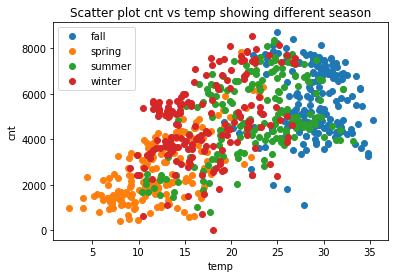

In [182]:
groups = bikes_df.groupby("season")
for name, group in groups:
    plt.plot(group["temp"], group["cnt"], marker="o", linestyle="", label=name)
plt.title('Scatter plot cnt vs temp showing different season')
plt.xlabel('temp')
plt.ylabel('cnt')    
plt.legend()

# Data Preparation


In [183]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 85.7+ KB


In [184]:
# dropping instant,dteday col as these are not required in our analysis
# dropping casual,registered col as these are part of our dependent variable, casual + registered = cnt. So we have to predict this. We can't use them as predictor.
bikes_df.drop('instant', axis=1,inplace=True)
bikes_df.drop('dteday', axis=1,inplace=True)
bikes_df.drop('casual', axis=1,inplace=True)
bikes_df.drop('registered', axis=1,inplace=True)

In [185]:
# Select all categorical variables
df_categorical = bikes_df.select_dtypes(include=['object'])
df_categorical.columns

Index(['season', 'mnth', 'weathersit'], dtype='object')

#### Converting categorical variables to dummies, and store in a different dataframe

In [186]:
# One Hot Encoding - convert into dummies
df_dummies = pd.get_dummies(df_categorical,drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_cloudy,weathersit_rainy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [187]:
list(df_categorical.columns)

['season', 'mnth', 'weathersit']

In [188]:
bikes_df = bikes_df.drop(list(df_categorical.columns),axis=1)

In [189]:
bikes_df.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

#### Concatenating original dataframe with dataframe containing dummy variables

In [190]:
bikes_df = pd.concat([bikes_df, df_dummies], axis=1)

In [191]:
bikes_df.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_cloudy,weathersit_rainy
0,0,0,1,1,14.110847,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,2,1,14.902598,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,3,1,8.050924,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,4,1,8.200000,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,5,1,9.305237,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


# Scaling

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [193]:
list(bikes_df.describe().columns)

['yr',
 'holiday',
 'weekday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weathersit_cloudy',
 'weathersit_rainy']

#### Performing scaling on all numerical variables except for dependent variable

In [194]:
# cols - temp, hum, windspeed
var = ['temp','hum','windspeed']
bikes_df[var] = scaler.fit_transform(bikes_df[var])

In [195]:
bikes_df.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_cloudy,weathersit_rainy
0,0,0,1,1,-0.827613,1.252343,-0.387833,985,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,2,1,-0.722069,0.480996,0.748899,801,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,3,1,-1.635432,-1.338073,0.745931,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,4,1,-1.615560,-0.261577,-0.389769,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,5,1,-1.468226,-1.340294,-0.046477,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


# Model Building


### Dividing into X and Y sets for the model building


In [196]:
X = bikes_df.drop('cnt', axis=1)
y = bikes_df['cnt']

In [197]:
X.shape

(730, 23)

In [198]:
y.shape

(730,)

## Splitting the Data into Training and Testing Sets

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [200]:
X_train.shape

(511, 23)

In [201]:
X_test.shape

(219, 23)

In [202]:
y_train.shape

(511,)

In [203]:
y_test.shape

(219,)

In [204]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [205]:
regressor.coef_

array([ 1927.5378563 ,  -694.0619294 ,    16.32606151,  -229.97491547,
         899.53862256,  -250.4464416 ,  -231.85821583,  -833.85112716,
         -38.99349112,   512.50103148,  -235.28984129,  -425.28724933,
        -407.80155924,  -506.39428801,  -747.86883113,  -309.60961654,
          37.74960377,   260.68907437,  -531.99738882,    77.8134849 ,
         389.97166505,  -390.37355087, -1673.31374121])

In [206]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

In [207]:
coeff_df

,Coefficient
yr,1927.537856
holiday,-694.061929
weekday,16.326062
workingday,-229.974915
temp,899.538623
hum,-250.446442
windspeed,-231.858216
season_spring,-833.851127
season_summer,-38.993491
season_winter,512.501031


In [208]:
print(regressor.intercept_)

4134.730427287828


In [209]:
# Make predictions

y_pred = regressor.predict(X_test)

In [210]:
cmp = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
cmp

,Actual,Predicted
196,5923,4134.325625
187,4592,4787.711877
14,1248,1225.335136
31,1360,901.626736
390,4075,3773.371951
...,...,...
155,4906,4060.641785
391,3456,3329.372737
571,6861,6320.320866
306,3974,3813.786916


In [211]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 585.718063934541
Mean Squared Error: 594601.1176609411
Root Mean Squared Error: 771.103830661566


In [212]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8582616933755836

In [213]:
# Adjusted r2

yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.832994830950277 0.8251075231717481


In [214]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8582616933755834 0.8415438418250112


# RFE


In [215]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Passing 20 as column for RFE selection

In [216]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20) 
rfe = rfe.fit(X_train, y_train)

In [217]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 2),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_rainy', True, 1)]

In [218]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weathersit_cloudy', 'weathersit_rainy'],
      dtype='object')

In [219]:
len(X_train.columns[rfe.support_])

20

In [220]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_cloudy,weathersit_rainy
235,0,0,1,0.971447,-0.159207,0.807856,0,0,1,0,0,0,0,0,0,0,0,0,0,0
524,1,0,0,1.176404,-1.339408,-0.596345,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12,0,0,0,-1.806853,-1.105121,1.425844,1,0,0,0,0,1,0,0,0,0,0,0,0,0
161,0,0,1,1.253834,0.189286,-0.460042,0,0,0,0,0,0,0,1,0,0,0,0,0,0
556,1,0,1,1.208290,0.039931,-0.500264,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [221]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Building model using all the columns returned by RFE

In [222]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     121.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.20e-175
Time:                        20:42:08   Log-Likelihood:                -4121.7
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     490   BIC:                             8374.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4163.0520    130.51

In [223]:
checkVIF(X_train_new)

,Features,VIF
0,const,14.06
8,season_winter,7.60
4,temp,7.24
17,mnth_Oct,4.24
7,season_spring,4.23
16,mnth_Nov,4.15
10,mnth_Dec,2.97
13,mnth_Jul,2.95
14,mnth_Jun,2.66
9,mnth_Aug,2.64


### Dropping columns one by one based on high p-value and high VIF

In [224]:
#Drop mnth_Oct as this contains highest p-value=0.803
X_train_new.drop('mnth_Oct', axis=1,inplace=True)
X_train_new.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_May,mnth_Nov,mnth_Sep,weathersit_cloudy,weathersit_rainy
235,1.0,0,0,1,0.971447,-0.159207,0.807856,0,0,1,0,0,0,0,0,0,0,0,0,0
524,1.0,1,0,0,1.176404,-1.339408,-0.596345,0,0,0,0,0,0,0,1,0,0,0,0,0
12,1.0,0,0,0,-1.806853,-1.105121,1.425844,1,0,0,0,0,1,0,0,0,0,0,0,0
161,1.0,0,0,1,1.253834,0.189286,-0.460042,0,0,0,0,0,0,0,1,0,0,0,0,0
556,1.0,1,0,1,1.208290,0.039931,-0.500264,0,0,0,0,0,0,1,0,0,0,0,0,0


In [225]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     128.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.08e-176
Time:                        20:42:11   Log-Likelihood:                -4121.8
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     491   BIC:                             8368.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4169.0149    128.19

In [226]:
checkVIF(X_train_new)

,Features,VIF
0,const,13.59
4,temp,7.13
7,season_spring,4.07
13,mnth_Jul,2.87
8,season_winter,2.85
14,mnth_Jun,2.59
9,mnth_Aug,2.56
12,mnth_Jan,2.44
5,hum,2.23
11,mnth_Feb,1.98


In [227]:
#Drop mnth_Aug as this contains highest p-value=0.248
X_train_new.drop('mnth_Aug', axis=1,inplace=True)

In [228]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     135.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.77e-177
Time:                        20:42:13   Log-Likelihood:                -4122.5
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     492   BIC:                             8363.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4096.1974    111.68

In [229]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.31
4,temp,4.34
7,season_spring,3.97
8,season_winter,2.50
11,mnth_Jan,2.30
5,hum,2.21
10,mnth_Feb,1.95
15,mnth_Nov,1.81
17,weathersit_cloudy,1.67
12,mnth_Jul,1.64


In [230]:
#Drop mnth_Jun as this contains highest p-value=0.238
X_train_new.drop('mnth_Jun', axis=1,inplace=True)

In [231]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.91e-178
Time:                        20:42:15   Log-Likelihood:                -4123.2
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     493   BIC:                             8359.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4060.3714    107.53

In [232]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.55
7,season_spring,3.95
4,temp,3.67
8,season_winter,2.45
11,mnth_Jan,2.27
5,hum,2.15
10,mnth_Feb,1.94
14,mnth_Nov,1.80
16,weathersit_cloudy,1.65
9,mnth_Dec,1.58


### All the p-values are smaller than 0.05 and VIF smaller than 5
Adjusted R-squared is 0.826.

So can evaluate this model

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [233]:
X_train_lm = sm.add_constant(X_train_new) #Adding the constant
lm = sm.OLS(y_train,X_train_lm).fit() # fitting the model
y_train_pred = lm.predict(X_train_lm)




In [234]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy',
       'weathersit_rainy'],
      dtype='object')

Text(0, 0.5, 'y_train_pred')

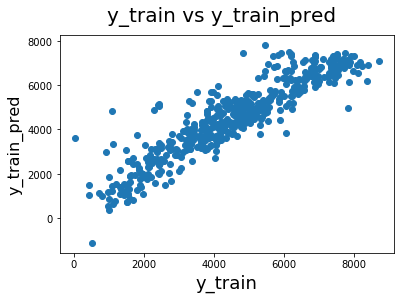

In [247]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)   

Text(0.5, 0, 'Errors')

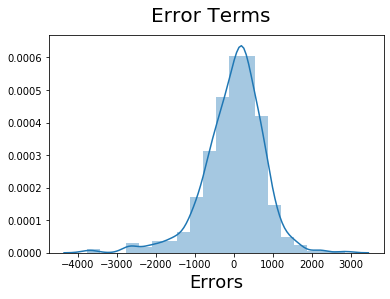

In [236]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [237]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [238]:
X_test.head()

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,season_spring,season_summer,...,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_cloudy,weathersit_rainy
196,1.0,0,0,1,1,1.044324,-0.299777,0.230206,0,0,...,0,1,0,0,0,0,0,0,0,0
187,1.0,0,0,6,0,1.390471,0.165860,-0.403911,0,0,...,0,1,0,0,0,0,0,0,0,0
14,1.0,0,0,1,1,-1.433378,-0.905983,-0.419873,1,0,...,1,0,0,0,0,0,0,0,1,0
31,1.0,0,0,4,1,-1.658333,1.419143,-1.771543,1,0,...,0,0,0,0,0,0,0,0,1,0
390,1.0,1,0,6,0,-0.841277,0.997560,-1.511109,1,0,...,1,0,0,0,0,0,0,0,1,0


In [239]:
# Creating X_test dataframe by dropping variables from X_test

X_test = X_test.drop(["mnth_Aug", "mnth_Jun", "mnth_Oct"], axis = 1)

In [240]:
# Creating X_test dataframe by dropping variables from X_test

X_test = X_test.drop(["weekday", "season_summer", "mnth_Dec"], axis = 1)


In [241]:
X_test.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy',
       'weathersit_rainy'],
      dtype='object')

In [242]:
# Making predictions using the model

y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

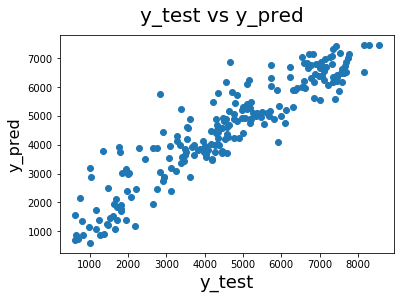

In [243]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [244]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8472922999355836

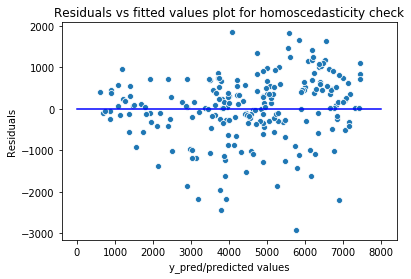

In [245]:
residuals = y_test.values-y_pred.values

p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,8000],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Text(0.5, 0, 'Errors')

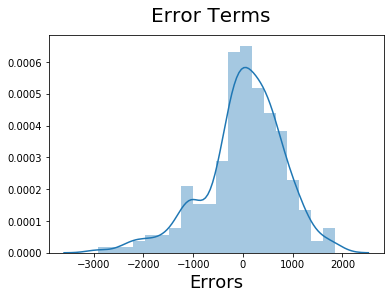

In [246]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**`Model Evaluation:`** 

1. Check the R-squared and adjusted R-squared, greater than 60% is good. In our case it is appproximately 84%.
2. p-value of all predicting variables is smaller than 0.05
3. VIF value of all predicting variables is smaller than 10
4. Error terms are normally distributed
5. Residuals have equal or almost equal variance.
